In [1]:
from tensorflow.examples.tutorials.mnist import input_data

In [2]:
mnist = input_data.read_data_sets('data',one_hot=True)

Extracting data/train-images-idx3-ubyte.gz
Extracting data/train-labels-idx1-ubyte.gz
Extracting data/t10k-images-idx3-ubyte.gz
Extracting data/t10k-labels-idx1-ubyte.gz


In [3]:
import matplotlib.pyplot as plt
import numpy as np

In [4]:
mnist.train.images.shape

(55000, 784)

In [5]:
mnist.test.images.shape

(10000, 784)

In [6]:
mnist.validation.images.shape

(5000, 784)

In [7]:
imagen_0 = mnist.test.images[0]

In [8]:
imagen_0.shape

(784,)

In [9]:
imagen_0= np.resize(imagen_0,(28,28))

In [10]:
%matplotlib inline

In [11]:
imagen_0.shape

(28, 28)

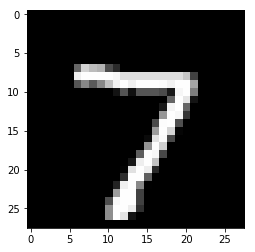

In [12]:
plt.imshow(imagen_0,'Greys_r')

In [13]:
batch_size=100
learning_rate=0.05
training_epochs=2000
import tensorflow as tf


x = tf.placeholder(tf.float32, [None, 784], name="entradas")
W = tf.Variable(tf.zeros([784, 10]),name="pesos")
b = tf.Variable(tf.zeros([10]),name="biases")
y = tf.matmul(x, W) + b

y_ = tf.placeholder(tf.float32, [None, 10])

cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=y))
#cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=y))
train_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(cross_entropy)
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
with tf.Session() as sess:
    tf.global_variables_initializer().run()
    for _ in range(training_epochs):
        batch_xs, batch_ys = mnist.train.next_batch(100)
        sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})

    print(sess.run(accuracy, feed_dict={x: mnist.test.images,y_: mnist.test.labels}))
    print("listo el pollo")
    num= np.random.randint(0,mnist.test.images.shape[0])
    img=mnist.test.images[num]
    classification= sess.run(tf.argmax(y,1),feed_dict={x:[img]})
    print('Neural Network predicted', classification[0])  
    print('Real label is:', np.argmax(mnist.test.labels[num]))
    saver = tf.train.Saver() 
    save_path = saver.save(sess, "checkpoints/softmax_mnist") 
    print("Model saved to %s" % save_path)


0.9106
listo el pollo
Neural Network predicted 3
Real label is: 3
Model saved to checkpoints/softmax_mnist


In [14]:
tf.reset_default_graph()

In [15]:
sess=tf.InteractiveSession()
saver= tf.train.import_meta_graph('checkpoints/softmax_mnist.meta')
saver.restore(sess, "checkpoints/softmax_mnist")
w=sess.graph.get_tensor_by_name("pesos:0")
b=sess.graph.get_tensor_by_name("biases:0")
print(sess.run('pesos:0'))

[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]


In [22]:
image_b = np.reshape(mnist.test.images[100],(-1,784))

In [23]:
image_b.shape

(1, 784)

In [24]:
inpu=tf.placeholder(tf.float32,[1,784])
y2=tf.nn.softmax(tf.matmul(inpu,w)+b)
print(sess.run(y2,feed_dict={inpu:image_b}))

[[ 0.00426904  0.0040801   0.04661974  0.00253732  0.01521468  0.00152379
   0.90410215  0.00263866  0.01316711  0.00584742]]


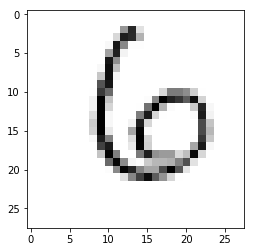

In [25]:
plt.imshow(image_b.reshape([28, 28]), cmap='Greys') 
plt.show()